In [2]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
%matplotlib inline

Напишем функцию, которая по заданному параметру $\theta$ будет возвращать массивы со всеми оценками.

Алгоритм действий внутри функции.

1) Посчитаем динамикой массивы $\bar{X}, X_{(1)}, X_{(n)}$ для всех $n\leq N$.

2) Для всех $n < N$ посчитаем оценки параметра $\theta$ из теоретической задачи. Для $2\bar{X}, \bar{X} + X_{(n)} / 2, (n+1)X_{(1)}, X_{(1)} + X_{(n)}, \frac{(n+1)}{n}X_{(n)}$ в указанном порядке.

In [3]:
# Функция принимает 2 аргумента, параметр равномерного распределения и размеры выборки.
def count_estiminations(theta, sample_len = 10**4):
    uniform = stats.uniform(loc=0, scale=theta)
    sample = uniform.rvs(sample_len)
    # Подсчет выборочного среднего.
    cur_sum = 0
    x_mean = []
    for i in range(sample.size):
        cur_sum += sample[i]
        x_mean.append(cur_sum / (i+1))
    # Подсчет первой порядковой статистики.
    cur_min = 1000
    x_min = []
    for i in range(sample.size):
        if (sample[i] < cur_min): cur_min = sample[i]
        x_min.append(cur_min)
    # Подсчет n-ой порядковой статистики.
    cur_max = -1000
    x_max = []
    for i in range(sample.size):
        if (sample[i] > cur_max): cur_max = sample[i]
        x_max.append(cur_max)
    
    # Подсчет статистик в указанном порядке.
    estimation_1 = np.array(x_mean) * 2
    estimation_2 = np.array(x_mean) + np.array(x_max) / 2
    estimation_3 = np.array([(n + 2) * x_min[n] for n in range(sample.size)])
    estimation_4 = np.array(x_min) + np.array(x_max)
    estimation_5 = np.array([((n + 2) / (n + 1)) * x_max[n] for n in range(sample.size)])
    
    return estimation_1, estimation_2, estimation_3, estimation_4, estimation_5

Построим на одном графике разными цветами для всех оценок функции модуля, разности оценки и истинного значения $\theta$ в зависимости от $n$.

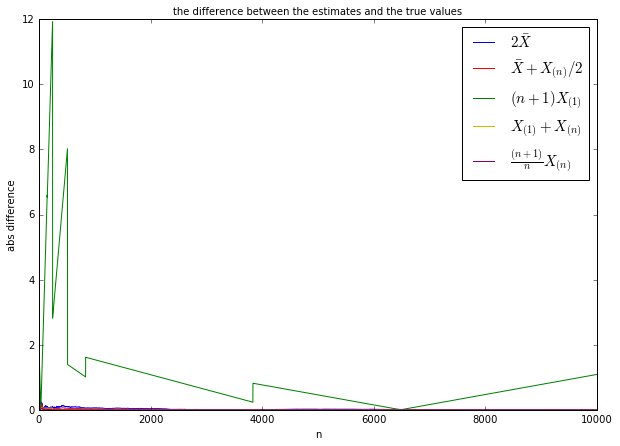

In [34]:
theta = 2
# Получаем оценки.
e1,e2,e3,e4,e5 = count_estiminations(theta)
n = range(1,10**4 + 1)
# График.
plt.figure(figsize=(10, 7))
plt.xlabel("n")
plt.ylabel(r"abs difference")
plt.plot(n, abs(e1 - theta), color='b', label=r"$2\bar{X} $")
plt.plot(n, abs(e2 - theta), color='r', label=r"$\bar{X} + X_{(n)} / 2 $")
plt.plot(n, abs(e3 - theta), color='g', label=r"$(n+1)X_{(1)}$")
plt.plot(n, abs(e4 - theta), color='y', label=r"$X_{(1)} + X_{(n)}$")
plt.plot(n, abs(e5 - theta), color='purple', label=r"$\frac{(n+1)}{n}X_{(n)}$")
plt.title(r'the difference between the estimates and the true values', fontsize=10)
plt.legend(fontsize=15, loc=1)
plt.show()

Заметим, что оценка: $(n+1)X_{(1)}$ сильно отличется от истинного значения параметра $\theta$, исключим ее. 

Построим новый график с другим значением $\theta$ в увеличенном масштабе по оси ординат

In [35]:
# Функция для построения графиков для оценок.
# Второй параметр, это ограничение по оси ординат.
def get_estim_plt(theta,ylim=0.06):
    e1,e2,e3,e4,e5 = count_estiminations(theta)
    n = range(1,10**4 + 1)
    # График.
    plt.figure(figsize=(10, 5))
    plt.xlabel("n")
    plt.ylabel(r"abs difference")
    plt.plot(n, abs(e1 - theta), color='b', label=r"$2\bar{X} $")
    plt.plot(n, abs(e2 - theta), color='r', label=r"$\bar{X} + X_{(n)} / 2 $")
    plt.plot(n, abs(e4 - theta), color='y', label=r"$X_{(1)} + X_{(n)}$")
    plt.plot(n, abs(e5 - theta), color='purple', label=r"$\frac{(n+1)}{n}X_{(n)}$")
    plt.title(r'the difference between the estimates and the true values', fontsize=10)
    plt.legend(fontsize=15, loc=1)
    # Ограничиваем масштаб по оси ординат.
    pylab.ylim(0,ylim)
    plt.show()
    # Выводим значения отклонений при максимальном n.
    print('blue:', abs(e1[10**4 - 1] - theta), 'red:', abs(e2[10**4 - 1] - theta), 'yellow:', abs(e4[10**4 - 1] - theta),
          'purple', abs(e5[10**4 - 1] - theta))

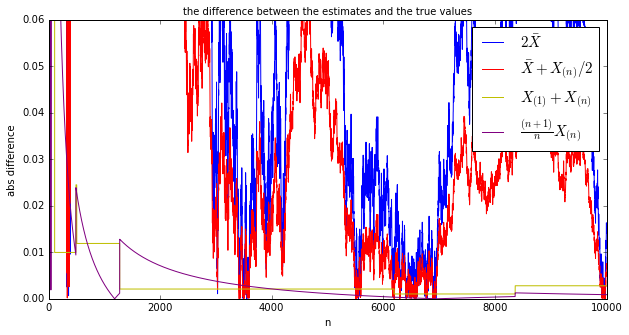

blue: 0.0158500481954 red: 0.00736795465105 yellow: 0.00280292683451 purple 0.000885749692802


In [37]:
get_estim_plt(20)

Видно, что оценка $\frac{(n+1)}{n}X_{(n)}$ получилась лучше.

Проведем еще несколько экспериментов, меняя значение $\theta$

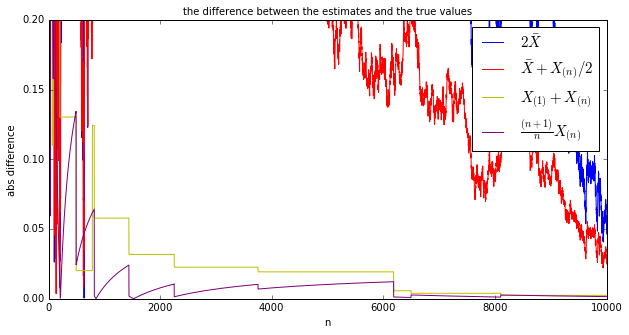

blue: 0.0465210873261 red: 0.0249790883023 yellow: 0.0024532101336 purple 0.00156256701261


In [40]:
get_estim_plt(50, 0.2)

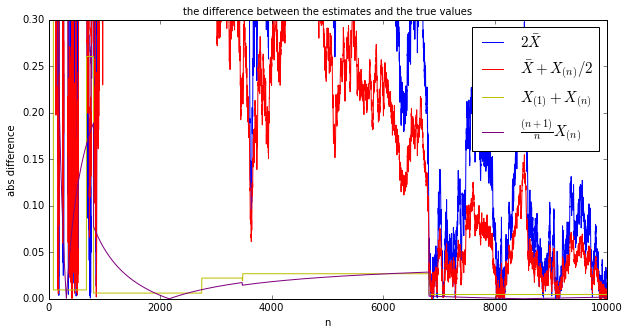

blue: 0.0165403496273 red: 0.00237526104277 yellow: 0.00467013433327 purple 0.00179100652456


In [41]:
get_estim_plt(100,0.3)

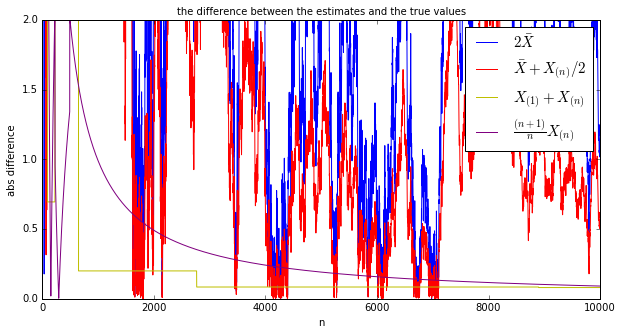

blue: 1.03790574495 red: 0.51465802227 yellow: 0.0806708757518 purple 0.091409440622


In [42]:
get_estim_plt(1000,2)

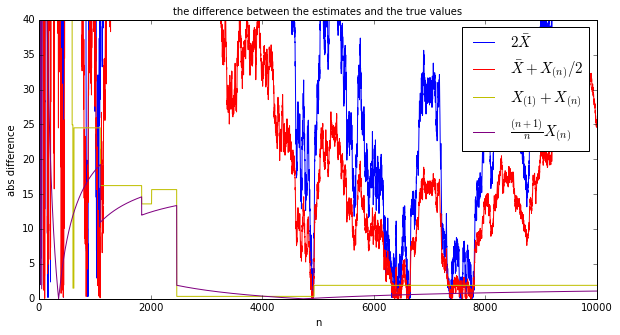

blue: 47.2946193912 red: 24.7027596548 yellow: 1.92952760077 purple 1.11111100831


In [43]:
get_estim_plt(10000,40)

### Вывод.
Общая тенденция видна. Оценка $X_{(1)} + X_{(n)}$ стремится к $\theta$ приблизительно как $\frac{(n+1)}{n}X_{(n)}$, обе они лучше чем $\bar{X} + X_{(n)} / 2 $, которая в свою очередь лучше чем $2\bar{X} $. Оценка $(n+1)X_{(1)}$  не стремится к $\theta$. 

При увеличении $\theta$ модуль разности всех оценок и $\theta$ увеличивается.